<a href="https://colab.research.google.com/github/mkuti/Alpha-blog/blob/master/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-02-28 11:49:16--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  79.8MB/s    in 0.3s    

2025-02-28 11:49:16 (79.8 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

<Axes: >

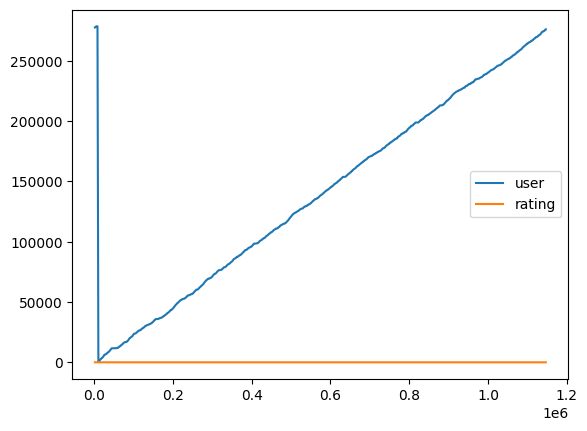

In [ ]:
# Clean data - remove users whith less than 200 ratings and books with less than 100
df_filtered_ratings = df_ratings[df_ratings.groupby('user')['rating'].transform('count') >= 200]
df_filtered_ratings = df_filtered_ratings[df_filtered_ratings.groupby('isbn')['rating'].transform('count') >= 100]
df_filtered_ratings.plot()





In [ ]:
# Create new dataframe
# rating_count = df_filtered_ratings.groupby('isbn')['rating'].count()
# rating_avg = df_filtered_ratings.groupby('isbn')['rating'].mean()
# new_ratings_df = pd.DataFrame({'ratings_count':rating_count, 'rating_avg': rating_avg})
df = df_books.merge(df_filtered_ratings, on='isbn')
df

,isbn,title,author,user,rating
0,0440234743,The Testament,John Grisham,277478,0.0
1,0440234743,The Testament,John Grisham,2977,0.0
2,0440234743,The Testament,John Grisham,3363,0.0
3,0440234743,The Testament,John Grisham,7346,9.0
4,0440234743,The Testament,John Grisham,9856,0.0
...,...,...,...,...,...
13609,0446607657,When the Wind Blows,James Patterson,266056,0.0
13610,0446607657,When the Wind Blows,James Patterson,266226,0.0
13611,0446607657,When the Wind Blows,James Patterson,268330,0.0
13612,0446607657,When the Wind Blows,James Patterson,271284,0.0


In [ ]:
# Drop duplicates
# df.drop_duplicates('title')


In [ ]:
# # Prepare features
# pivot_table = df.pivot_table(index=['title'], columns=['user'], values='rating', fill_value=0)
# x_matrix = csr_matrix(pivot_table)
# print(x_matrix)


# Prepare features
pivot_table = df.pivot_table(index=['title'], columns=['user'], values='rating', fill_value=0)




In [ ]:
# knn = NearestNeighbors(n_neighbors=5, metric='cosine')
# knn.fit(x_matrix)

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(pivot_table)


NearestNeighbors(metric='cosine')

In [ ]:
# function to return recommended books - this will be tested
# def get_recommends(book_title):
#   # book_features = x_matrix.loc[book_title]
#   book_index = pivot_table.index.get_loc(book_title)

#   distances, indices = knn.kneighbors(x_matrix[book_index])
#   recommended_books_titles = [[book_title]]
#   recommended_list = []

#   # Get book titles
#   recommended_books = pivot_table.iloc[indices[0][1:]].index
#   new_distances = distances[0][1:]

#   for index, book in enumerate(recommended_books):
#     recommended_list.append([book, new_distances[index]])

#   recommended_books_titles.append(recommended_list)

#   return recommended_books_titles

# get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")

def get_recommends(book_title):
  # book_features = x_matrix.loc[book_title]
  book_features = pivot_table.loc[book_title].values

  distances, indices = knn.kneighbors([book_features])
  recommended_books_titles = [[book_title]]
  recommended_list = []

  # Get book titles
  recommended_books = pivot_table.iloc[indices[0][1:]].index
  new_distances = distances[0][1:]

  for index, book in enumerate(recommended_books):
    recommended_list.append([book, new_distances[index]])

  recommended_books_titles.append(recommended_list)

  return recommended_books_titles

get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")


[["Where the Heart Is (Oprah's Book Club (Paperback))"],
 [['The Lovely Bones: A Novel', 0.7234864],
  ["The Pilot's Wife : A Novel", 0.8192678],
  ['The Joy Luck Club', 0.81986046],
  ['The Notebook', 0.8236683]]]

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

[["Where the Heart Is (Oprah's Book Club (Paperback))"], [['The Lovely Bones: A Novel', 0.7234864], ["The Pilot's Wife : A Novel", 0.8192678], ['The Joy Luck Club', 0.81986046], ['The Notebook', 0.8236683]]]
You haven't passed yet. Keep trying!
